In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime



# Attempt to read the CSV file with a different encoding
try:
    df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    df = pd.read_csv('/content/data.csv', encoding='utf-16')

# Display the first few rows of the dataframe
print(df.head())
print(df.info())
df.shape



  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

(541909, 8)

In [25]:
# Remove rows where 'CustomerID' is missing or blank
df_cleaned = df.dropna(subset=['CustomerID'])  # Drop rows where 'CustomerID' is NaN
df_cleaned = df_cleaned[df_cleaned['CustomerID'].astype(str).str.strip() != '']  # Drop rows where 'CustomerID' is an empty string

# Display the shape of the cleaned DataFrame
print("\nShape of the DataFrame after removing rows with missing or blank 'CustomerID':")
print(df_cleaned.shape)

# Display the first few rows of the cleaned DataFrame
print("\nFirst few rows of the cleaned DataFrame:")
print(df_cleaned.head())

# Display total count of rows with non-missing and non-blank 'CustomerID'
print("\nTotal count of rows with non-missing and non-blank 'CustomerID':")
print(df_cleaned.shape[0])


Shape of the DataFrame after removing rows with missing or blank 'CustomerID':
(406829, 8)

First few rows of the cleaned DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Total count of rows with non-missing and non-blank 'CustomerID':
406829


In [26]:
# Convert 'InvoiceDate' to datetime format, handling different formats
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], errors='coerce', infer_datetime_format=True)

# Format 'InvoiceDate' to 'dd-mm-yyyy hh:mm'
df_cleaned['InvoiceDate'] = df_cleaned['InvoiceDate'].dt.strftime('%d-%m-%Y %H:%M')

# Display the first few rows with the standardized 'InvoiceDate' column
print("\nFirst few rows with the standardized 'InvoiceDate' column:")
print(df_cleaned.head())

<ipython-input-26-476befce2e9b>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], errors='coerce', infer_datetime_format=True)



First few rows with the standardized 'InvoiceDate' column:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom  


In [29]:
# Convert 'InvoiceDate' back to datetime for month extraction
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], format='%d-%m-%Y %H:%M')

# Extract month names from 'InvoiceDate'
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.strftime('%B')
# Extract day names from 'InvoiceDate'
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.strftime('%A')
# Extract year from 'InvoiceDate'
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year

# Display the first few rows with the new 'Month' column
print("\nFirst few rows with the standardized 'InvoiceDate' and new 'Month' column:")
print(df_cleaned.head())


First few rows with the standardized 'InvoiceDate' and new 'Month' column:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country     Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   

         Day  Year  
0  Wednesday  2010  
1  W

In [32]:
# Calculate 'SaleValue' using 'Quantity' and 'UnitPrice'
df_cleaned['SaleValue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
# Calculate total number of transactions
total_transactions = df_cleaned.shape[0]

# Calculate total sales
total_sales = df_cleaned['SaleValue'].sum()

# Calculate average transaction value
average_transaction_value = df_cleaned['SaleValue'].mean()

# Display the results
print("\nTotal Number of Transactions:", total_transactions)
print("Total Sales:", total_sales)
print("Average Transaction Value:", average_transaction_value)
print(df_cleaned.head())


Total Number of Transactions: 406829
Total Sales: 8300065.814000001
Average Transaction Value: 20.401853884555923
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country     Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   

       

**Descriptive Analysis:**

In [35]:
# Calculate 'SaleValue' using 'Quantity' and 'UnitPrice'
df_cleaned['SaleValue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Calculate total revenue (total sales)
total_revenue = df_cleaned['SaleValue'].sum()

# Display the total revenue
print("Total Revenue:", total_revenue)




Total Revenue: 8300065.814000001


In [36]:
# Aggregate total revenue by 'StockCode' (product)
product_revenue = df_cleaned.groupby('StockCode')['SaleValue'].sum()

# Sort products by revenue in descending order and select top 10
top_10_products = product_revenue.sort_values(ascending=False).head(10)

# Display the top 10 best-selling products by revenue
print("Top 10 Best-Selling Products by Revenue:")
print(top_10_products)

Top 10 Best-Selling Products by Revenue:
StockCode
22423     132870.40
85123A     93979.20
85099B     83236.76
47566      67687.53
POST       66710.24
84879      56499.22
23084      51137.80
22502      46980.95
79321      45936.81
22086      41500.48
Name: SaleValue, dtype: float64


In [39]:
# Determine the total number of unique customers
unique_customers = df_cleaned['CustomerID'].nunique()
# Display the total number of unique customers
print("Total Number of Unique Customers:", unique_customers)

Total Number of Unique Customers: 4372


**Sales Trends:**

<ipython-input-41-36a1c605b527>:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], errors='coerce', infer_datetime_format=True)


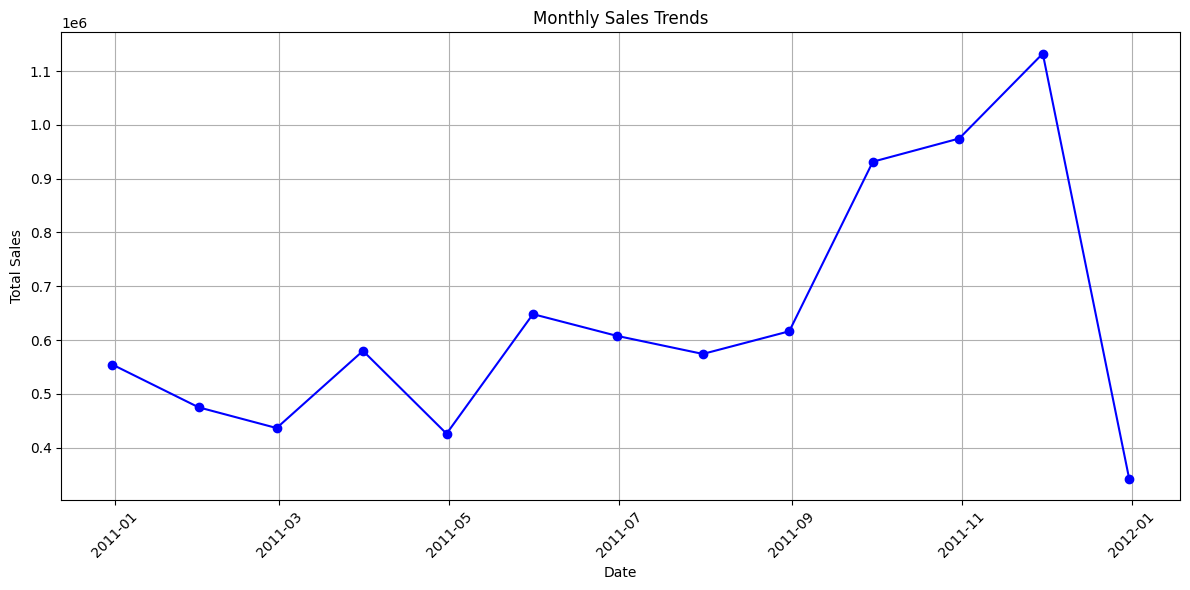

In [41]:
# Calculate 'SaleValue' using 'Quantity' and 'UnitPrice'
df_cleaned['SaleValue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Convert 'InvoiceDate' to datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], errors='coerce', infer_datetime_format=True)

# Drop rows where 'InvoiceDate' could not be parsed
df_cleaned = df_cleaned.dropna(subset=['InvoiceDate'])

# Set 'InvoiceDate' as index
df_cleaned.set_index('InvoiceDate', inplace=True)

# Resample sales data by month
monthly_sales = df_cleaned['SaleValue'].resample('M').sum()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

**Customer Analysis**


In [49]:
# Ensure 'SaleValue' and 'CustomerID' are available
print("Columns in cleaned DataFrame:", df_cleaned.columns)

# Calculate the number of transactions per customer
transactions_per_customer = df_cleaned.groupby('CustomerID').size()

# Calculate the average number of transactions per customer
average_transactions_per_customer = transactions_per_customer.mean()

# Calculate total spend per customer
spend_per_customer = df_cleaned.groupby('CustomerID')['SaleValue'].sum()

# Calculate the average spend per customer
average_spend_per_customer = spend_per_customer.mean()

# Display the results
print(f"Average number of transactions per customer: {average_transactions_per_customer:.2f}")
print(f"Average spend per customer: {average_spend_per_customer:.2f}")


Columns in cleaned DataFrame: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'SaleValue'],
      dtype='object')
Average number of transactions per customer: 93.05
Average spend per customer: 1898.46


In [51]:
# Assuming df_cleaned is already prepared and contains 'SaleValue' and 'CustomerID'

# Calculate total spend per customer
spend_per_customer = df_cleaned.groupby('CustomerID')['SaleValue'].sum()

# Determine the threshold for the top 10% of customers
threshold = spend_per_customer.quantile(0.90)

# Identify the most valuable customers
most_valuable_customers = spend_per_customer[spend_per_customer > threshold]

# Sort the most valuable customers by total spend in descending order
most_valuable_customers = most_valuable_customers.sort_values(ascending=False)

# Display the top 10% most valuable customers
print("Most Valuable Customers (Top 10% by Total Spend):")
print(most_valuable_customers)

# Optionally, display the number of top 10% customers and their total spend
print(f"\nNumber of Top 10% Customers: {len(most_valuable_customers)}")
print(f"Total Spend by Top 10% Customers: ₹{most_valuable_customers.sum():.2f}")

Most Valuable Customers (Top 10% by Total Spend):
CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
             ...    
13552.0      3539.53
13334.0      3536.82
17160.0      3518.03
13953.0      3515.68
16131.0      3506.54
Name: SaleValue, Length: 438, dtype: float64

Number of Top 10% Customers: 438
Total Spend by Top 10% Customers: ₹4984121.39


Sales Performance by Country:
                      Total Sales  Number of Transactions  \
Country                                                     
United Kingdom        6767873.394                  361878   
Netherlands            284661.540                    2371   
EIRE                   250285.220                    7485   
Germany                221698.210                    9495   
France                 196712.840                    8491   
Australia              137077.270                    1259   
Switzerland             55739.400                    1877   
Spain                   54774.580                    2533   
Belgium                 40910.960                    2069   
Sweden                  36595.910                     462   
Japan                   35340.620                     358   
Norway                  35163.460                    1086   
Portugal                29059.810                    1480   
Finland                 22326.740                     6

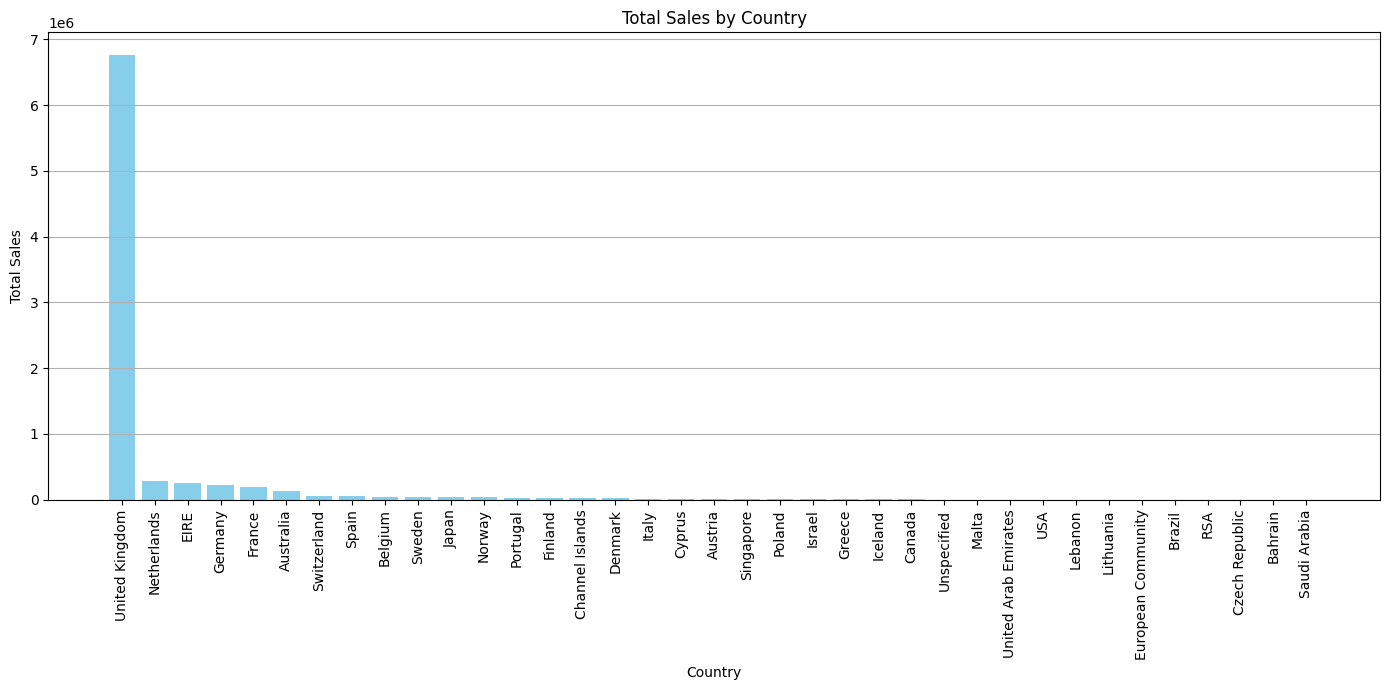

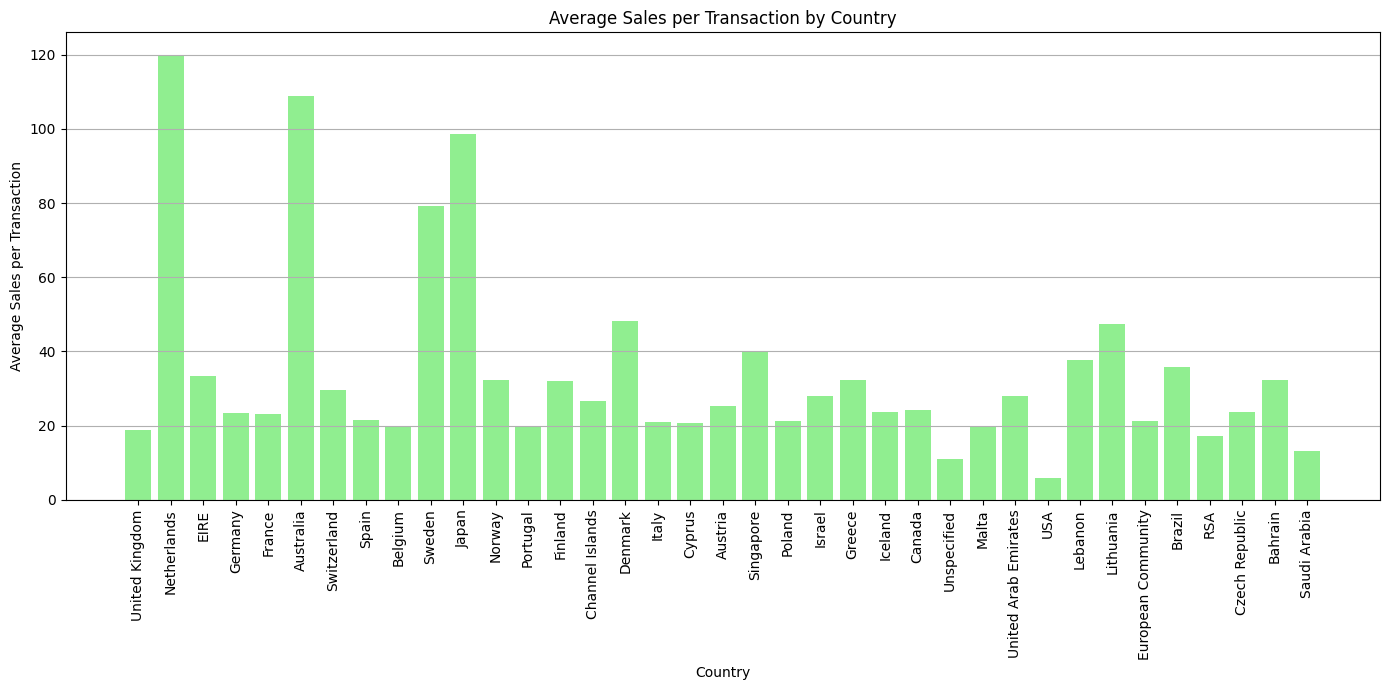

In [52]:

# Calculate total sales per country
sales_per_country = df_cleaned.groupby('Country')['SaleValue'].sum()

# Calculate the number of transactions per country
transactions_per_country = df_cleaned.groupby('Country').size()

# Calculate average sales per transaction by country
average_sales_per_country = sales_per_country / transactions_per_country

# Combine metrics into a single DataFrame for easier visualization
country_performance = pd.DataFrame({
    'Total Sales': sales_per_country,
    'Number of Transactions': transactions_per_country,
    'Average Sales per Transaction': average_sales_per_country
})

# Sort by total sales in descending order
country_performance = country_performance.sort_values(by='Total Sales', ascending=False)

# Display the sales performance by country
print("Sales Performance by Country:")
print(country_performance)

# Plot the total sales by country
plt.figure(figsize=(14, 7))
plt.bar(country_performance.index, country_performance['Total Sales'], color='skyblue')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot the average sales per transaction by country
plt.figure(figsize=(14, 7))
plt.bar(country_performance.index, country_performance['Average Sales per Transaction'], color='lightgreen')
plt.title('Average Sales per Transaction by Country')
plt.xlabel('Country')
plt.ylabel('Average Sales per Transaction')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [65]:


# Calculate the total sales for each StockCode by Country
sales_by_product_country = df_cleaned.groupby(['Country', 'StockCode'])['SaleValue'].sum().reset_index()

# Find the top-selling product in each country
top_selling_products_by_country = sales_by_product_country.loc[sales_by_product_country.groupby('Country')['SaleValue'].idxmax()]

# Display the results
print("\nTop Selling Product by Country:")
print(top_selling_products_by_country)



Top Selling Product by Country:
                    Country StockCode  SaleValue
397               Australia     23084    3375.84
906                 Austria      POST    1456.00
914                 Bahrain     23076     120.00
1700                Belgium      POST    4248.00
1713                 Brazil     22423     175.20
1879                 Canada      POST     550.94
2031        Channel Islands     22423     517.80
2582                 Cyprus     22827     580.00
2819         Czech Republic     22326      70.80
2939                Denmark     22625     734.40
3799                   EIRE     22423    6987.15
5083     European Community      POST     141.00
5541                Finland      POST    3472.00
7064                 France      POST   15065.00
8735                Germany      POST   20821.00
8873                 Greece      POST     285.00
8962                Iceland    84558A     371.70
9077                 Israel     22423     551.10
9674                  Italy      POS

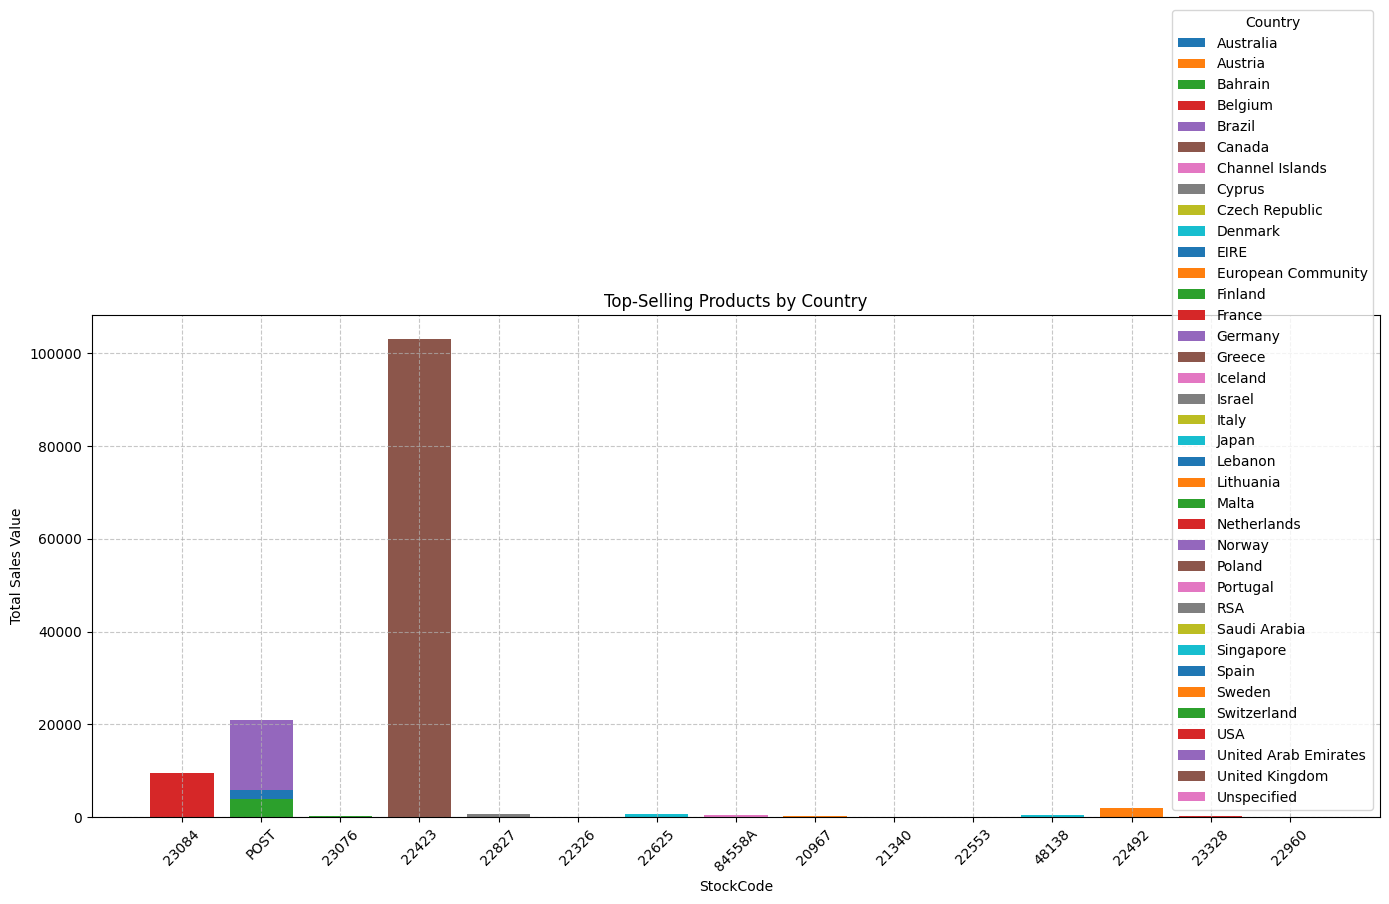

In [66]:


# Assuming df_cleaned is already processed and contains the necessary columns

# Calculate the total sales for each StockCode by Country
sales_by_product_country = df_cleaned.groupby(['Country', 'StockCode'])['SaleValue'].sum().reset_index()

# Find the top-selling product in each country
top_selling_products_by_country = sales_by_product_country.loc[sales_by_product_country.groupby('Country')['SaleValue'].idxmax()]

# Plotting
plt.figure(figsize=(14, 8))

# Create a bar plot for each country
for country in top_selling_products_by_country['Country'].unique():
    country_data = top_selling_products_by_country[top_selling_products_by_country['Country'] == country]
    plt.bar(country_data['StockCode'], country_data['SaleValue'], label=country)

plt.title('Top-Selling Products by Country')
plt.xlabel('StockCode')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


**FRM CALCULATON FOR CUTOMER PURCHASE BEHAVIOUR**

In [ ]:

# Strip leading/trailing spaces from column names
df_cleaned.columns = df_cleaned.columns.str.strip()

# Ensure 'InvoiceDate' column exists
if 'InvoiceDate' not in df_cleaned.columns:
    raise KeyError("'InvoiceDate' column is missing in df_cleaned.")

# Convert 'InvoiceDate' to datetime format, handling different formats
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], errors='coerce', infer_datetime_format=True)

# Drop rows where 'InvoiceDate' could not be parsed
df_cleaned = df_cleaned.dropna(subset=['InvoiceDate'])

# Format 'InvoiceDate' to 'dd-mm-yyyy hh:mm' and then convert back to datetime
df_cleaned['InvoiceDate'] = df_cleaned['InvoiceDate'].dt.strftime('%d-%m-%Y %H:%M')
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], format='%d-%m-%Y %H:%M')

# Extract month names, day names, and year from 'InvoiceDate'
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.strftime('%B')
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.strftime('%A')
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year

# Calculate 'SaleValue' using 'Quantity' and 'UnitPrice'
df_cleaned['SaleValue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Calculate total number of transactions
total_transactions = df_cleaned.shape[0]

# Calculate total sales
total_sales = df_cleaned['SaleValue'].sum()

# Calculate average transaction value
average_transaction_value = df_cleaned['SaleValue'].mean()

# Display the results
print("\nTotal Number of Transactions:", total_transactions)
print("Total Sales:", total_sales)
print("Average Transaction Value:", average_transaction_value)

# Set 'InvoiceDate' as index
df_cleaned.set_index('InvoiceDate', inplace=True)

# Calculate Recency, Frequency, and Monetary metrics
current_date = pd.to_datetime('today')

# Recency: Days since last purchase for each customer
recency_df = df_cleaned.groupby('CustomerID').apply(lambda x: (current_date - x.index.max()).days).reset_index(name='Recency')

# Frequency: Number of transactions for each customer
frequency_df = df_cleaned.groupby('CustomerID').size().reset_index(name='Frequency')

# Monetary: Total spend for each customer
monetary_df = df_cleaned.groupby('CustomerID')['SaleValue'].sum().reset_index(name='Monetary')

# Merge RFM metrics into one DataFrame
rfm_df = recency_df.merge(frequency_df, on='CustomerID')
rfm_df = rfm_df.merge(monetary_df, on='CustomerID')

# Display the RFM DataFrame
print("\nRFM DataFrame:")
print(rfm_df.head())
